In [1]:
"""
notebook: 1.0.-leibold-data-modeling_shapash.jpynb

author: Christian Leibold

created/updated at: 2025-12-15

intention: start SHAPASH app 

content:
---------
-> load saved SmartExplainer object from SHAPASH
-> start SHAPASH App on localhost

"""

'\nnotebook: 1.0.-leibold-data-modeling_shapash.jpynb\n\nauthor: Christian Leibold\n\ncreated/updated at: 2025-12-15\n\nintention: start SHAPASH app \n\ncontent:\n---------\n-> load saved SmartExplainer object from SHAPASH\n-> start SHAPASH App on localhost\n\n'

In [2]:
# classic packages
# import pandas as pd
# import numpy as np
from joblib import dump, load

# visualization
# import matplotlib.pyplot as plt

# make custom libraries importable
import sys
sys.path.append('../../library')

# evaluation
import shap
import dash
from shapash import SmartExplainer


/opt/homebrew/Caskroom/miniconda/base/envs/ds_project_defense/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# ------------------------------------------------------------------------------- 
# loading saved objects
# -------------------------------------------------------------------------------
# # load fitted model
# model = load("../../models/model_rf_over_under_2019_2024.joblib")

## load shap values 
#shap_values = load('../../models/shap_values_rf_multiclass_final.joblib')

# # store feature_names in object + make a list object for indexing later
# feature_names = shap_values.feature_names

# load smartExplainer
#xpl = SmartExplainer.load("../../models/xpl_shapash.pkl")
xpl = load('../../models/xpl_shapash.pkl')


/opt/homebrew/Caskroom/miniconda/base/envs/ds_project_defense/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/opt/homebrew/Caskroom/miniconda/base/envs/ds_project_defense/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [4]:
app.kill()

In [4]:
# Add back the old alias
dash.Dash.run_server = dash.Dash.run

app = xpl.run_app(host="127.0.0.1", port=8051, title_story="Road Accidents Severity")

INFO:root:Your Shapash application run on http://127.0.0.1:8051/
INFO:root:Use the method .kill() to down your app.


In [26]:
# ------------------------------------------------------------------------------- 
# force plot for all classes to insprect single rows -> still does not work at the moment
# -------------------------------------------------------------------------------
shap.initjs()

row_idx = 1234   # the row you want to explain
n_classes = shap_values.values.shape[2]   # number of classes (here 4)

# Loop through each class
for class_idx in range(n_classes):
    base_val   = shap_values.base_values[row_idx, class_idx]
    shap_val   = shap_values.values[row_idx, :, class_idx]
    features   = shap_values.data[row_idx]

    # Display force plot for this class
    display(shap.force_plot(
        base_val,
        shap_val,
        features,
        feature_names=shap_values.feature_names,
        #matplotlib=True   # optional: ensures inline rendering in notebooks
        #link='logit'

    ))

Summary plot for class 0


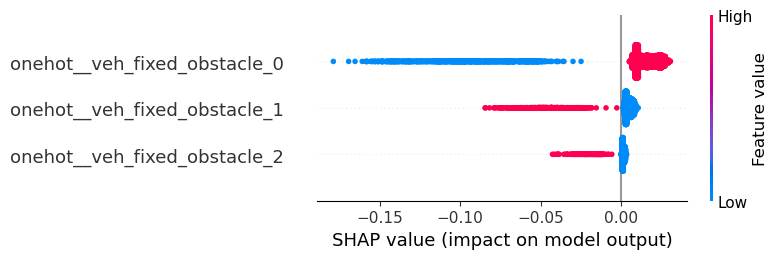

Summary plot for class 1


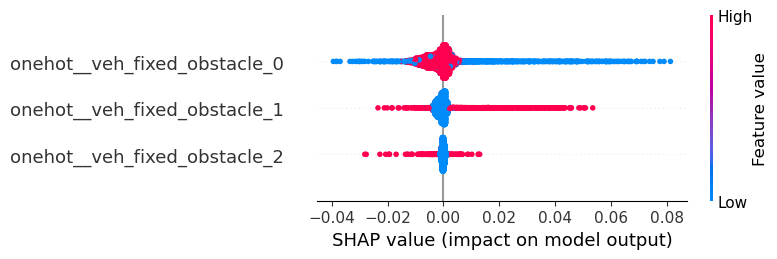

Summary plot for class 2


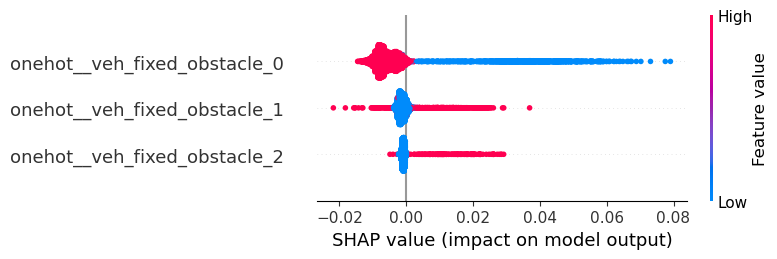

Summary plot for class 3


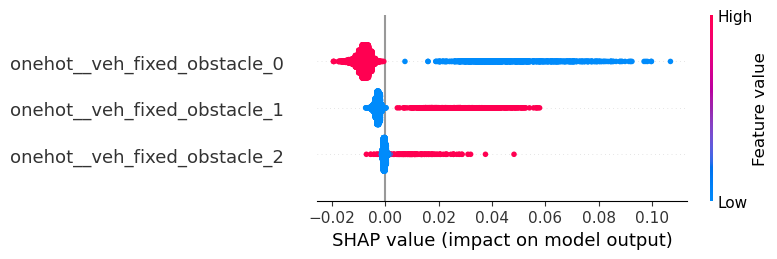

In [25]:
# ------------------------------------------------------------------------------- 
# beeswarm plot looped over all classes with subset of features
# -------------------------------------------------------------------------------
# Filter names that start with the prefix
prefix = "onehot__veh_fixed_obstacle"
#prefix = "cyclical__"
selected_features = [f for f in feature_names_list if f.startswith(prefix)]

# Get indices of the selected features
selected_idx = [feature_names_list.index(f) for f in selected_features]

# Iterate over classes
for c in range(shap_values.values.shape[-1]):  
    # Slice SHAP values for class c and selected features
    shap_subset = shap_values.values[:, selected_idx, c]
    
    # Slice corresponding feature data directly from shap_values.data
    X_subset = shap_values.data[:, selected_idx]
    
    print(f"Summary plot for class {c}")
    shap.summary_plot(
        shap_subset,
        features=X_subset,
        feature_names=selected_features,
        max_display=len(selected_features)
    )
